<a href="https://colab.research.google.com/github/ShmatArtem/TMSds/blob/main/HW23_Shmat_Artem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import random

In [ ]:
df_full = pd.read_csv('Five_years_of_Russian_Rap_Dataset.csv')
df_full

,track_id,artist_name,Song_Success,album_release_date,hit_n,Drums_Energy,Drums_Complexity,Variety_of_musical_instruments,Mixing_Quality,Harmonic_Richness,...,track_number,explicit,key_name,mode_name,key_mode,artists_all,remake,artist_id,album_id,download_link
0,5OFMeePbu2eEX1Hyf2tzYj,044 ROSE,hit,2017-06-23,0,1.748407,0.531356,0.677570,0.595927,1.209290,...,1,True,G#,major,G# major,LIL MORTY; 044 ROSE,original,2V8aJ7qCArKAmHAX7u81Sj,4lsz5FpE3SFVuniECODcNN,https://p.scdn.co/mp3-preview/c37091967a02a815...
1,29kkmN00FdzizRg5xrVmBF,044 ROSE,none,2017-12-08,1,0.714910,1.291384,0.735496,0.669723,0.673321,...,1,True,C,major,C major,ВАЙС; 044 ROSE,original,2V8aJ7qCArKAmHAX7u81Sj,6jnftxbUPDmmpOgt9gdvFb,https://p.scdn.co/mp3-preview/04d4f628d8305b88...
2,7L1tQKY6mcy0sGXntrABgW,044 ROSE,none,2018-02-13,1,0.778734,0.574680,0.950734,0.516571,0.672520,...,1,True,B,major,B major,044 ROSE,original,2T1bAXQppVRoSNm63zcvzI,2Ib1KBcvNVWMHl5txJgk5l,https://p.scdn.co/mp3-preview/a257eed4179821af...
3,4jwDiUBqLQCCuyWkbX87qN,044 ROSE,none,2018-02-13,1,1.291229,0.561352,0.688906,0.514869,1.160833,...,2,True,G#,major,G# major,044 ROSE; LIL MORTY,original,2V8aJ7qCArKAmHAX7u81Sj,2Ib1KBcvNVWMHl5txJgk5l,https://p.scdn.co/mp3-preview/91fedfb65d95d8bd...
4,2DYUk5AkUV7kPTvd58LVCw,044 ROSE,none,2018-02-13,1,0.900054,0.551893,0.600117,0.786980,0.530228,...,3,True,B,minor,B minor,044 ROSE,original,2T1bAXQppVRoSNm63zcvzI,2Ib1KBcvNVWMHl5txJgk5l,https://p.scdn.co/mp3-preview/e312514b3efa7d10...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14392,4wns4XvrgIzbJpuqI3XDMm,Ямаджи,none,2021-05-13,1,0.864495,0.593435,0.553840,0.575138,1.179876,...,1,False,D,major,D major,Ямаджи; Фейджи; Umut Dogan,remix,1vhOS1zU5F96OtQUoMT47i,3xb00R4syhrYAFR1wqwRHS,https://p.scdn.co/mp3-preview/e4666de93fd0c631...
14393,4e0CBEnMxQAWhziaEx3auF,Ямаджи,none,2021-09-03,1,1.033098,0.579569,0.916616,0.678888,0.665118,...,1,False,F#,minor,F# minor,Allega; Ямаджи,original,1vhOS1zU5F96OtQUoMT47i,23wAb8xEtL7kQLnpemza0J,https://p.scdn.co/mp3-preview/27451769f7ec68f8...
14394,4w90vN7ujiz5ewtQ9BYSyh,Ямаджи,none,2021-10-01,1,0.660209,0.605113,0.815678,0.569814,0.622238,...,1,False,D,major,D major,Allega; Ямаджи; Ramzan Abitov,remix,1vhOS1zU5F96OtQUoMT47i,79fyeVjH9swYEMJsQqcHsv,https://p.scdn.co/mp3-preview/a4b61cef73903b18...
14395,7d5HLXY5nbFEwRdkWkpH2Q,Ямаджи,none,2021-10-01,1,0.645725,0.643007,0.852564,0.636859,0.955037,...,1,False,F#,minor,F# minor,Ямаджи; DJ Cosmin; Emencee,remix,1vhOS1zU5F96OtQUoMT47i,6Gx80PWzX1OYtDE60LgYre,https://p.scdn.co/mp3-preview/435ed69578738fbc...


In [ ]:
df_full.columns

Index(['track_id', 'artist_name', 'Song_Success', 'album_release_date',
       'hit_n', 'Drums_Energy', 'Drums_Complexity',
       'Variety_of_musical_instruments', 'Mixing_Quality', 'Harmonic_Richness',
       'Mixing_Character', 'Emotional_Intensity', 'is_feat', 'n_feat',
       'status_guest', 'higher_guest', 'album_name', 'album_type',
       'track_number', 'explicit', 'key_name', 'mode_name', 'key_mode',
       'artists_all', 'remake', 'artist_id', 'album_id', 'download_link'],
      dtype='object')

In [ ]:
df = df_full.drop(['album_release_date', 'n_feat', 'status_guest', 'higher_guest', 'album_name', 'album_type',
       'track_number',  'key_name', 'mode_name', 'key_mode', 'artists_all', 'album_id', 'download_link', 'artist_id'], axis=1)

In [ ]:
to_encode = ['artist_name','Song_Success', 'is_feat', 'explicit', 'remake']

for column in to_encode:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])

df['track_id'] = range(0, df.shape[0])

In [ ]:
df.sample(5)

,track_id,artist_name,Song_Success,hit_n,Drums_Energy,Drums_Complexity,Variety_of_musical_instruments,Mixing_Quality,Harmonic_Richness,Mixing_Character,Emotional_Intensity,is_feat,explicit,remake
3364,3364,62,0,22,1.613034,0.623533,0.949476,0.568162,0.745867,1.273226,1.416706,0,0,2
2713,2713,50,1,0,0.655531,0.705241,0.627225,1.192123,0.605686,0.785071,0.523988,0,0,3
12011,12011,202,1,4,0.641485,0.869655,1.060989,0.599614,1.124139,0.633387,0.947636,1,0,2
12244,12244,205,1,0,0.829444,1.403601,2.244481,0.727789,0.685258,1.487890,0.786170,1,1,2
7003,7003,114,1,2,0.741185,1.011123,0.682860,0.832585,0.628035,2.426142,0.505108,1,0,2


In [ ]:
scaler = StandardScaler()

df_scaled = df.copy()
to_scale = df.drop(['track_id', 'artist_name', 'Song_Success', 'is_feat', 'explicit', 'remake'], axis=1)
for column in to_scale.columns:
    df_scaled[column] = scaler.fit_transform(df[[column]])

df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

Кластеризация

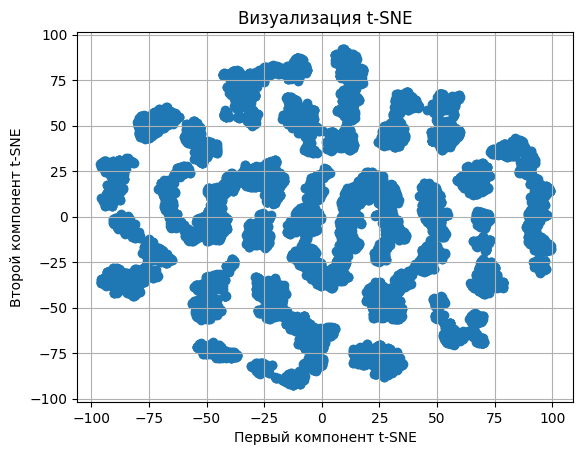

In [ ]:
X = df_scaled.drop('track_id', axis =1)
y = df_scaled['track_id']

tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(X)

plt.scatter(data_tsne[:, 0], data_tsne[:, 1])
plt.xlabel('Первый компонент t-SNE')
plt.ylabel('Второй компонент t-SNE')
plt.title('Визуализация t-SNE')
plt.grid(True)
plt.show()

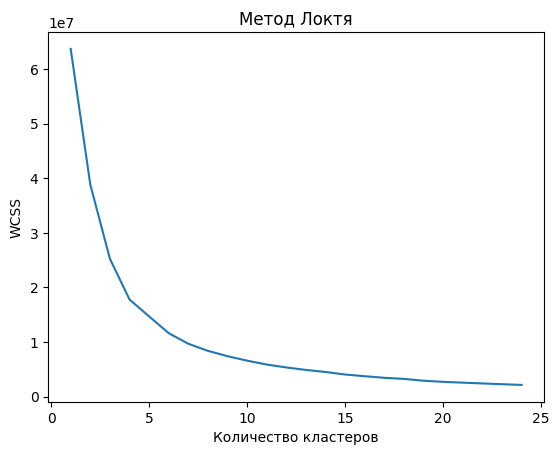

In [ ]:
inertia = []
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(data_tsne)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 25), inertia)
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.title('Метод Локтя')
plt.show()

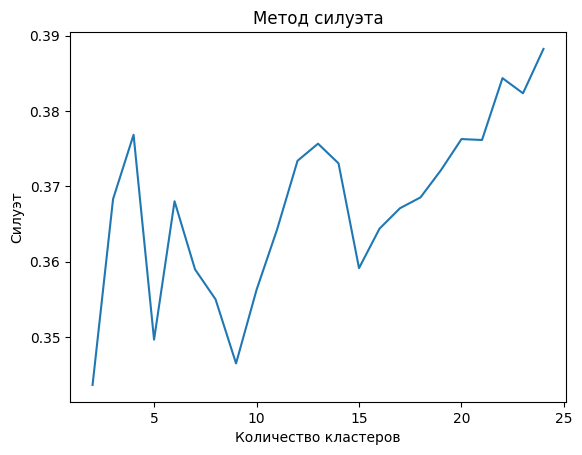

In [ ]:
silhouette_scores = []
for k in range(2, 25):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_tsne)
    silhouette_scores.append(silhouette_score(data_tsne, kmeans.labels_))

plt.plot(range(2, 25), silhouette_scores)
plt.xlabel('Количество кластеров')
plt.ylabel('Силуэт')
plt.title('Метод силуэта')
plt.show()

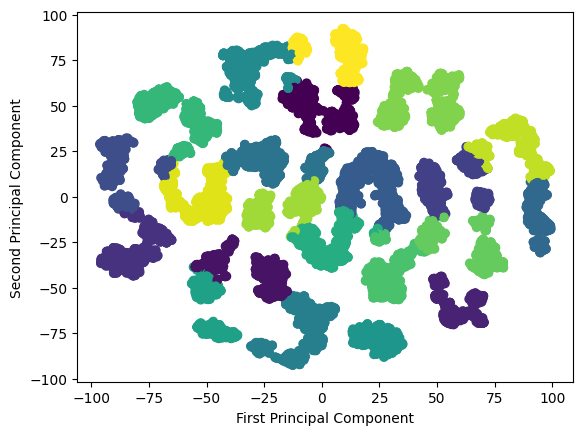

In [ ]:
n_clusters = 22
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(data_tsne)

plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

plt.show()

Количество кластеров: 15
Количество выбросов(синие точки): 0


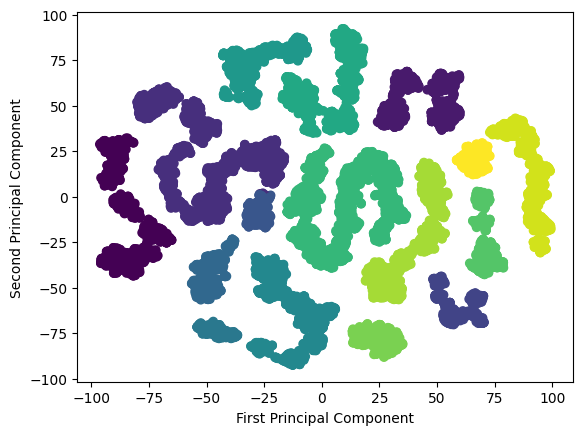

In [31]:
dbscan = DBSCAN(eps=7.5, min_samples= 100)
dbscan_labels = dbscan.fit_predict(data_tsne)

print(f'Количество кластеров: {len(set(dbscan_labels))-1}\nКоличество выбросов(синие точки): {list(dbscan_labels).count(-1)}')

plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=dbscan_labels, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

plt.show()

Для рекомендации возьмём за основу dbscan.

In [36]:
df['Cluster'] = dbscan_labels

In [71]:
def get_recommendations(id, num_songs = 10):
    target_cluster = int(df['Cluster'][df.track_id == id].iloc[0])
    recommended_tracks = list(df['track_id'][df.Cluster == target_cluster])
    tracks = random.sample(recommended_tracks, k=num_songs)

    return tracks

In [72]:
get_recommendations(4568)

[4359, 4545, 4548, 4512, 4402, 4433, 4552, 4521, 4388, 4603]